# Exercise 5 
Objective: Predict if a House has a Central Air Conditioning or not using Numeric Variables.
***
## Problem 1: Predicting CentralAir using SalePrice
Dataset from Kaggle : **"House Prices competition"** 
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

---

#### Essential Libraries
>NumPy : Library for Numeric Computations in Python<br>
Pandas : Library for Data Acquisition and Preparation<br>
Matplotlib : Low-level library for Data Visualization<br>
Seaborn : Higher-level library for Data Visualization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas, and take a quick look at the data using the `head` function.

In [2]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


a. Check the `catplot` for `CentralAir`, to visually understand the distribution.

In [3]:
housedata['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


### Simple Decision Tree

We will start by setting up a simple Classification Problem.   

Response Variable : **CentralAir**     
Predictor Feature : **SalePrice**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [4]:
centralair = pd.DataFrame(housedata['CentralAir'])
saleprice = pd.DataFrame(housedata['SalePrice'])

a1) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. 

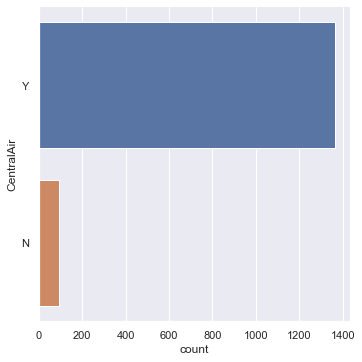

In [5]:
# Count Plot for CentralAir
sb.catplot(y = "CentralAir", data = housedata, kind = "count")

Note that the two levels of `CentralAir`, namely `Y` and `N`, are drastically imbalanced. This is not a very good situation for a classification problem. It is desirable to have balanced classes for classification, and there are several methods to make imbalanced classes balanced, or to get desired classification results even from imbalanced classes. If you are interested, check out the following article.
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

Plot `CentralAir` against `SalePrice` to visualize their mutual relationship.

a2) Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

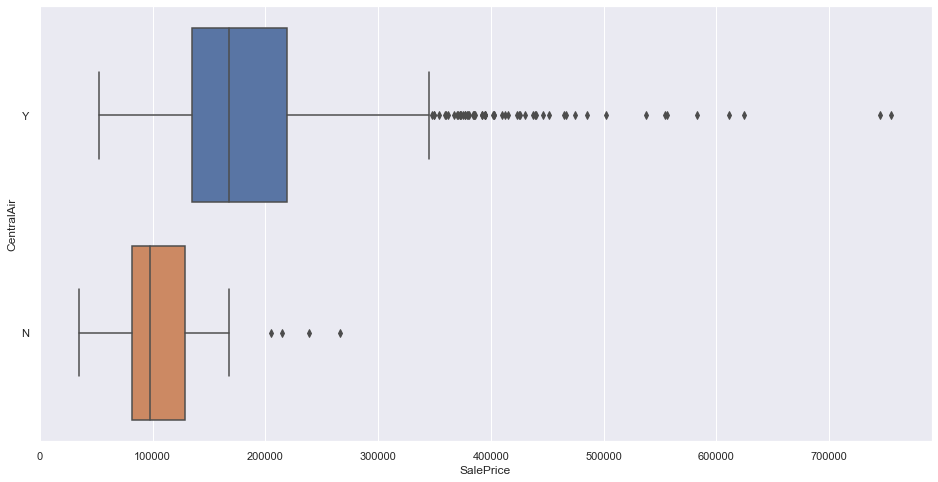

In [6]:
# Joint Boxplot of CentralAir against SalePrice
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = housedata, orient = "h")

Good to note that the two boxplots for `SalePrice`, for `CentralAir = Y` and `CentralAir = N`, are very different from one another in terms of their median value, as well as spread. This means that `CentralAir` has an effect on `SalePrice`, and hence, `SalePrice` will probably be an important variable in predicting `CentralAir`. Boxplots do not tell us where to make the cuts though -- it will be easier to visualize in the following `swarmplot`.  

a3) check the mutual relationship by plotting the two variables using a swarmplot.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

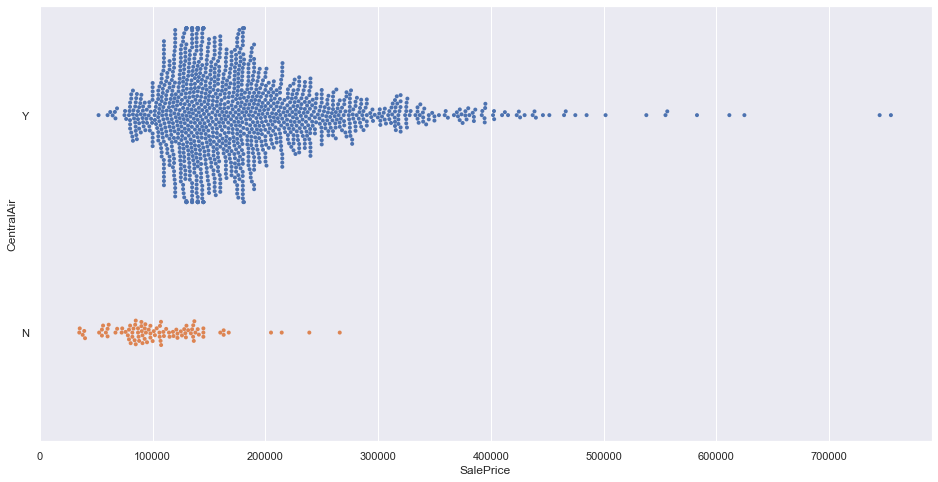

In [7]:
# Joint Swarmplot of CentralAir against SalePrice
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = housedata, orient = "h",  size=4)

#### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
**b)** Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [8]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

**c)** Prepare both the datasets by splitting in Train and Test sets.<br>
Train Set with 1100 samples and Test Set with 360 samples.

In [9]:
# Extra: random split
# import library for train_test_split
from sklearn.model_selection import train_test_split

# Random Train-Test-Split
houseData_train, houseData_test= train_test_split(housedata, test_size = 360)

# Check the sample sizes
print("Train set : ", houseData_train.shape)
print("Test set : ", houseData_test.shape)

Train set :  (1100, 81)
Test set :  (360, 81)


**d)** Train the Decision Tree Classifier model `dectree` using Train Set.

In [10]:
# Extract the two variables saleprice_train and centralair_train
centralair_train = pd.DataFrame(houseData_train['CentralAir'])
saleprice_train = pd.DataFrame(houseData_train['SalePrice'])

# Train the Decision Tree Classifier model
dectree.fit(saleprice_train, centralair_train)

DecisionTreeClassifier(max_depth=2)

**e)** Visualize the Decision Tree model using Plot Tree

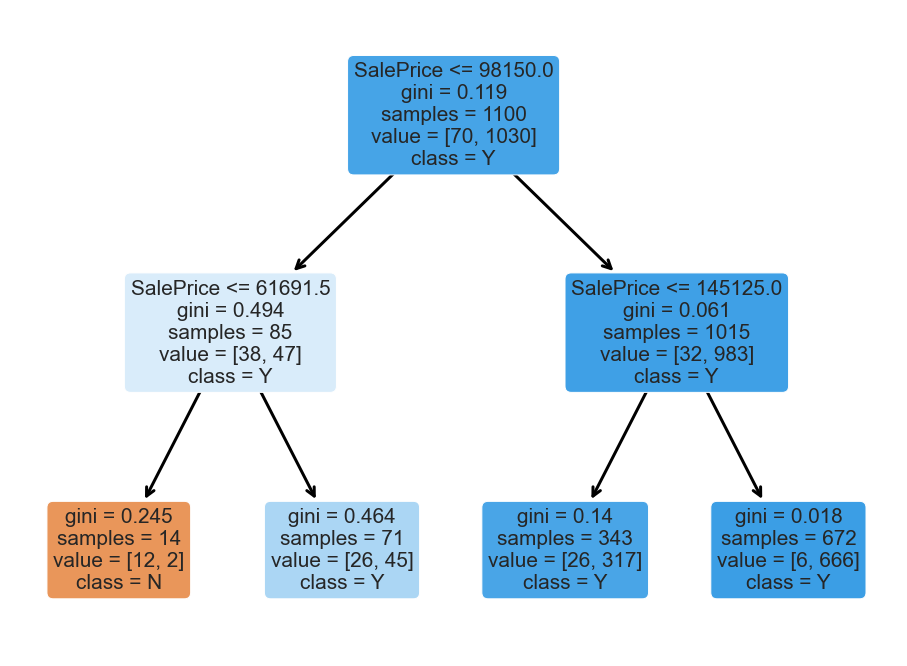

In [11]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 12))
out = plot_tree(dectree, 
          feature_names = saleprice_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled = True,
          rounded = True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
#plt.show()

#### Goodness of Fit of the Model
**f)** Check how good the predictions are on the Train Set.<br>
Metrics : Classifications Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.9454545454545454
[[  12   58]
 [   2 1028]]


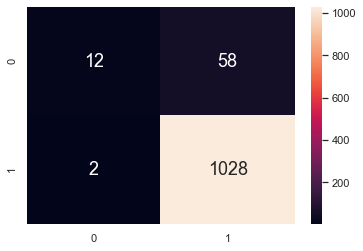

In [12]:
# Predict the Response corresponding to Predictors
centralair_train_pred = dectree.predict(saleprice_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(saleprice_train, centralair_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_train, centralair_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print(confusion_matrix(centralair_train, centralair_train_pred))

#### Prediction of Response based on the Predictor
Check how good the predictions are on the Test Set.<bR>
Metrics: Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.9333333333333333


<AxesSubplot:>

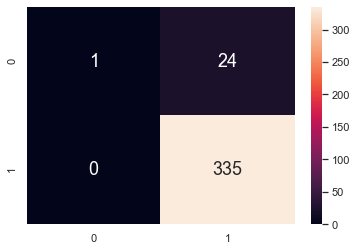

In [13]:
centralair_test = pd.DataFrame(houseData_test['CentralAir'])
saleprice_test = pd.DataFrame(houseData_test['SalePrice'])

# Predict the Response corresponding to Predictors
centralair_test_pred = dectree.predict(saleprice_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(saleprice_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, centralair_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Important** : Note the huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. In case of Training Data, **(NOTE these results are based on Fixed Top-Bottom splitting)** *False Positives* = 57 whereas *False Negatives* = 5. This is not surprising -- actually, this is a direct effect of the huge `Y` vs `N` imbalance in the `CentralAir` variable. As `CentralAir = Y` was more likely in the data, *False Positives* are more likely too.

***
## Problem 2 : Predicting CentralAir using Other Variables
Use the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9388888888888889



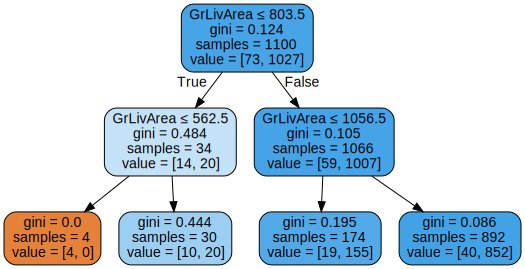

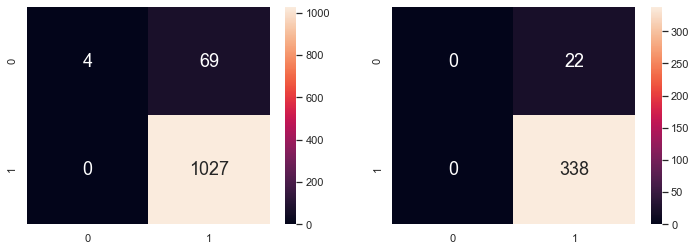

In [14]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier    # Step b
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(housedata['CentralAir'])
X = pd.DataFrame(housedata['GrLivArea'])

# Step c - Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Step d - Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Step f - Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Step e - Plot the Decision Tree
treedot = export_graphviz(dectree,                           # the model
                         feature_names = X_train.columns,    # the features
                         out_file = None,                    # output file
                         filled = True,                      # node colors
                         rounded = True,                     # make pretty
                         special_characters = True)          # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9277777777777778



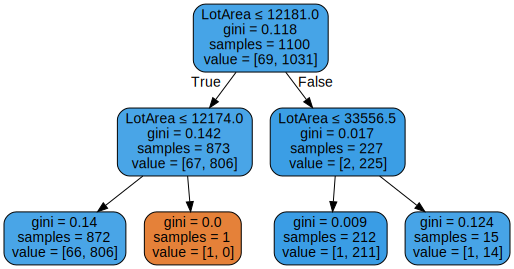

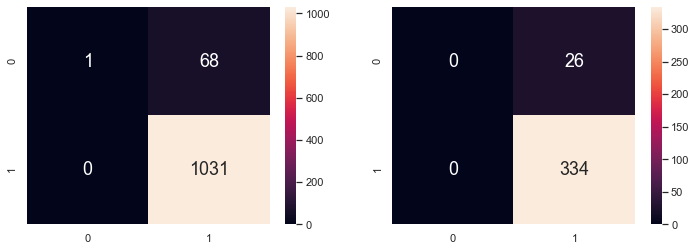

In [15]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier    # Step b
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(housedata['CentralAir'])
X = pd.DataFrame(housedata['LotArea'])

# Step c - Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Step d - Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Step f - Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Step e - Plot the Decision Tree
treedot = export_graphviz(dectree,                           # the model
                         feature_names = X_train.columns,    # the features
                         out_file = None,                    # output file
                         filled = True,                      # node colors
                         rounded = True,                     # make pretty
                         special_characters = True)          # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9444444444444444



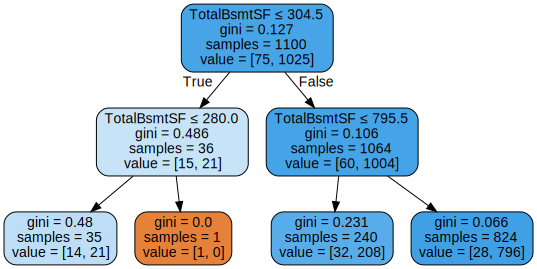

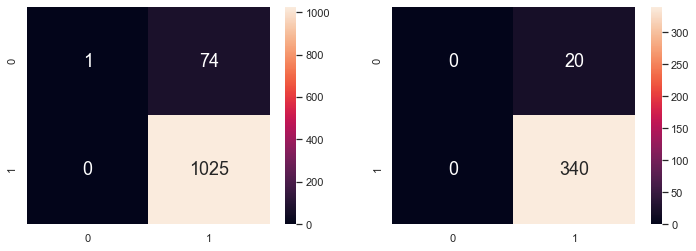

In [16]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier    # Step b
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(housedata['CentralAir'])
X = pd.DataFrame(housedata['TotalBsmtSF'])

# Step c - Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Step d - Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Step f - Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Step e - Plot the Decision Tree
treedot = export_graphviz(dectree,                           # the model
                         feature_names = X_train.columns,    # the features
                         out_file = None,                    # output file
                         filled = True,                      # node colors
                         rounded = True,                     # make pretty
                         special_characters = True)          # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9194444444444444



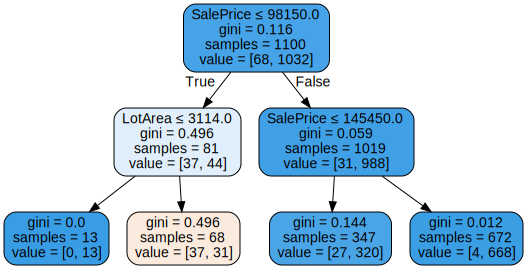

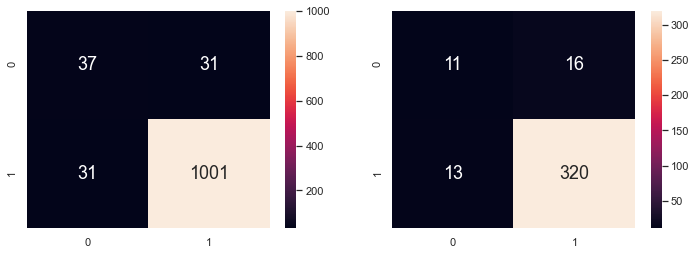

In [17]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier    # Step b
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(housedata['CentralAir'])
X = pd.DataFrame(housedata[['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']])

# Step c - Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Step d - Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Step f - Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Step e - Plot the Decision Tree
treedot = export_graphviz(dectree,                           # the model
                         feature_names = X_train.columns,    # the features
                         out_file = None,                    # output file
                         filled = True,                      # node colors
                         rounded = True,                     # make pretty
                         special_characters = True)          # postscript

graphviz.Source(treedot)